## Ejercicio 8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
opcion = 1
freq = 'Y'

In [4]:
data = pd.read_excel('../data/Ejercicio_8_datos.xlsx')
data.head()

,Accident_Date,Payment_Date,Indemnity
0,1992-06-30,1992-06-30,5445
1,1993-06-30,1993-06-30,5847
2,1994-06-30,1994-06-30,5981
3,1995-06-30,1995-06-30,7835
4,1996-06-30,1996-06-30,9763


In [846]:
# Check for missing data
print(data.isnull().any())

Accident_Date    False
Payment_Date     False
Indemnity        False
dtype: bool


In [847]:
data['Payment_Date'] = data['Payment_Date'].dt.to_period(freq)
data['Accident_Date'] = data['Accident_Date'].dt.to_period(freq)

In [848]:
data['Dev'] = (data['Payment_Date'] - data['Accident_Date']).apply(lambda x: x.n)
data.head()

,Accident_Date,Payment_Date,Indemnity,Dev
0,1992,1992,5445,0
1,1993,1993,5847,0
2,1994,1994,5981,0
3,1995,1995,7835,0
4,1996,1996,9763,0


In [849]:
#data.drop(data[data.Dev<0].index, inplace=True)

In [850]:
datagg = data.groupby(['Accident_Date','Dev']).agg({'Indemnity':'sum'}).reset_index()
datagg.head()

,Accident_Date,Dev,Indemnity
0,1992,0,5445
1,1992,1,3157
2,1992,2,2450
3,1992,3,1412
4,1992,4,600


In [851]:
triangle = datagg.pivot(index='Accident_Date',columns='Dev',values='Indemnity')
triangle

Dev,0,1,2,3,4,5,6,7
Accident_Date,,,,,,,,
1992,5445.0,3157.0,2450.0,1412.0,600.0,352.0,431.0,185.0
1993,5847.0,3486.0,1366.0,848.0,1045.0,1054.0,369.0,NaN
1994,5981.0,4854.0,1948.0,2554.0,1680.0,489.0,NaN,NaN
1995,7835.0,4453.0,3888.0,3335.0,2088.0,NaN,NaN,NaN
1996,9763.0,6517.0,3563.0,3984.0,NaN,NaN,NaN,NaN
1997,10745.0,6184.0,4549.0,NaN,NaN,NaN,NaN,NaN
1998,14137.0,8116.0,NaN,NaN,NaN,NaN,NaN,NaN
1999,15162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [852]:
# Accumulated Paids
accumulate = triangle.cumsum(axis=1)
accumulate

Dev,0,1,2,3,4,5,6,7
Accident_Date,,,,,,,,
1992,5445.0,8602.0,11052.0,12464.0,13064.0,13416.0,13847.0,14032.0
1993,5847.0,9333.0,10699.0,11547.0,12592.0,13646.0,14015.0,NaN
1994,5981.0,10835.0,12783.0,15337.0,17017.0,17506.0,NaN,NaN
1995,7835.0,12288.0,16176.0,19511.0,21599.0,NaN,NaN,NaN
1996,9763.0,16280.0,19843.0,23827.0,NaN,NaN,NaN,NaN
1997,10745.0,16929.0,21478.0,NaN,NaN,NaN,NaN,NaN
1998,14137.0,22253.0,NaN,NaN,NaN,NaN,NaN,NaN
1999,15162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [853]:
if opcion==4:
    accumulate.loc[1998,1] = accumulate.loc[1998,1] * 1.1
else:
    pass

In [854]:
# Check the shape of the triangle:
print(accumulate.shape)

(8, 8)


**Opción 1** - Average Paid LDFs

In [855]:
df = accumulate 
saltos = df.iloc[:, 1:].div(df.iloc[:, :-1].values)
saltos

Dev,1,2,3,4,5,6,7
Accident_Date,,,,,,,
1992,1.579798,1.284817,1.127760,1.048139,1.026944,1.032126,1.01336
1993,1.596203,1.146362,1.079260,1.090500,1.083704,1.027041,NaN
1994,1.811570,1.179788,1.199797,1.109539,1.028736,NaN,NaN
1995,1.568347,1.316406,1.206170,1.107017,NaN,NaN,NaN
1996,1.667520,1.218857,1.200776,NaN,NaN,NaN,NaN
1997,1.575523,1.268710,NaN,NaN,NaN,NaN,NaN
1998,1.574096,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [856]:
LDFs1 = saltos.mean().to_list()
LDFs1 = np.round(LDFs1, 3); LDFs1[4] = LDFs1[4] + 0.001 # Corrección para igualar con el paper
LDFs1

array([1.625, 1.236, 1.163, 1.089, 1.047, 1.03 , 1.013])

**Opcion 2** - Average 5y Paid LDFs

In [857]:
LDFs2 = saltos.apply(lambda col: col.dropna().tail(5).mean())
LDFs2 = LDFs2.to_list()
LDFs2 = np.round(LDFs2, 3); LDFs2[4] = LDFs2[4] + 0.001 # Corrección para igualar con el paper
LDFs2


array([1.639, 1.226, 1.163, 1.089, 1.047, 1.03 , 1.013])

**Opcion 3** - Mean Paid LDFs

In [858]:
# Payment Pattern 
n = len(accumulate)-1
LDFs3 = np.ones(n)

for i in range(n):
	SumDev = pd.Series(accumulate[i][:n-i]).sum(skipna=True)
	SumDevNext = pd.Series(accumulate[min(i+1,n)][:n-i]).sum(skipna=True)
	LDFs3[i] = SumDevNext/SumDev
LDFs3 = np.round(LDFs3, 3)
LDFs3

array([1.615, 1.239, 1.172, 1.092, 1.044, 1.03 , 1.013])

In [859]:
# Elegir opcion
opciones = {
    1: LDFs1,
    2: LDFs2,
    3: LDFs3,
    4: LDFs2,
}
LDFs = opciones.get(opcion, "Opción fuera del rango")

In [860]:
CDFs = np.ones(n+1)
for i in range(n):
	CDFs[i] = np.prod(LDFs[i:n])
CDFs

array([2.77889913, 1.71009177, 1.38356939, 1.18965554, 1.09242933,
       1.04339   , 1.013     , 1.        ])

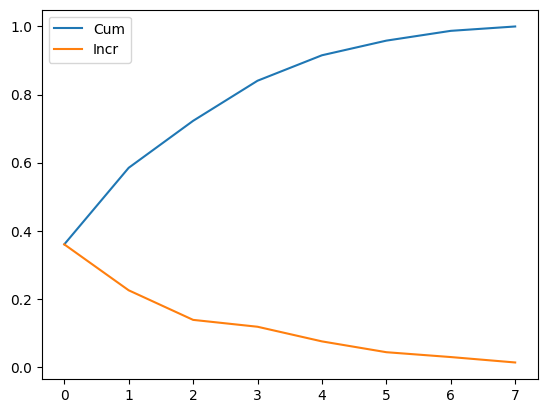

In [861]:
# Payment Pattern 
payment_pattern = pd.DataFrame(data=np.reciprocal(CDFs),columns=['Cum'])
payment_pattern['Incr'] = payment_pattern['Cum'].diff().fillna(payment_pattern['Cum']) #First value of diff() is always NaN
#print(payment_pattern)
#plt.plot(payment_pattern)
payment_pattern.plot()
plt.show()

In [862]:
# Payments = diagonal + flipud/fliplr
diagonal = np.diag(np.flipud(accumulate))
diagonal

array([15162., 22253., 21478., 23827., 21599., 17506., 14015., 14032.])

In [863]:
payments = pd.Series(data=diagonal)
payments


0    15162.0
1    22253.0
2    21478.0
3    23827.0
4    21599.0
5    17506.0
6    14015.0
7    14032.0
dtype: float64

In [864]:
print(f'Paid-to-Date: {payments.sum():,.0f}')

Paid-to-Date: 149,872


In [865]:
# Ultimate = CDFs * payment_k
ultimate = np.vdot(CDFs, payments)
print(f'Estimated Ultimate Losses: {ultimate:,.0f}')

Estimated Ultimate Losses: 208,341


In [866]:
# Reserve = ultimate - Sum(payments)
reserve = ultimate - np.sum(payments)
print(f'Estimated Loss Reserve: {reserve.round(0):,.0f}')

Estimated Loss Reserve: 58,469
